<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-2/blob/main/Dataset_MBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving MBP.csv to MBP (1).csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df_mbp = pd.read_csv('/content/MBP.csv')
df_mbp.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


In [14]:
if 'Date of Scraping' in df_mbp.columns:
    df_mbp.drop(columns=['Date of Scraping'], inplace=True)

In [15]:
df_mbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.6+ KB


In [16]:
missing_values = df_mbp.isna().sum()
missing_percent = (missing_values / len(df_mbp)) * 100
print("Missing Values Percentage:\n", missing_percent)

for col in df_mbp.columns:
    if missing_percent[col] >= 30:
        df_mbp.drop(col, axis=1, inplace=True)
    else:
        for col in df_mbp.select_dtypes(include=np.number).columns:
            df_mbp[col].fillna(df_mbp[col].median(), inplace=True)

Missing Values Percentage:
 Phone Name            0.000000
Rating ?/5            0.000000
Number of Ratings     0.000000
RAM                   0.000000
ROM/Storage           9.477124
Back/Rare Camera      0.490196
Front Camera         21.840959
Battery               0.544662
Processor             2.995643
Price in INR          0.000000
dtype: float64


In [17]:
df_mbp.dropna(inplace=True)

In [18]:
df_mbp.isna().sum()

,0
Phone Name,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,0
Back/Rare Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


In [19]:
df_mbp.duplicated().sum()

39

In [20]:
df_mbp.drop_duplicates(inplace = True)
df_mbp.duplicated().sum()

0

In [21]:
fix = ['Number of Ratings']
df_mbp[fix] = df_mbp[fix].apply(pd.to_numeric, errors='coerce')
df_mbp[fix].fillna(df_mbp[fix].median(), inplace=True)
df_mbp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1252 non-null   object 
 1   Rating ?/5         1252 non-null   float64
 2   Number of Ratings  171 non-null    float64
 3   RAM                1252 non-null   object 
 4   ROM/Storage        1252 non-null   object 
 5   Back/Rare Camera   1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   object 
dtypes: float64(2), object(8)
memory usage: 107.6+ KB


In [31]:
df_mbp['RAM'] = df_mbp['RAM'].astype(str).str.replace('GB RAM', '')
df_mbp['RAM'] = df_mbp['RAM'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_mbp['RAM'] = df_mbp['RAM'].replace('', np.nan)
df_mbp['RAM'] = df_mbp['RAM'].astype(float)
df_mbp['RAM'] = df_mbp['RAM'].astype(int)
df_mbp['RAM'].fillna(0, inplace=True)

df_mbp['Front Camera'] = df_mbp['Front Camera'].astype(str).str.replace('MP Front Camera', '').str.replace('MP', '').str.replace('MP Dual Front Camera', '')
df_mbp['Front Camera'] = df_mbp['Front Camera'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_mbp['Front Camera'] = df_mbp['Front Camera'].replace('', np.nan)
df_mbp['Front Camera'] = df_mbp['Front Camera'].astype(float)
df_mbp['Front Camera'] = df_mbp['Front Camera'].astype(int)
df_mbp['Front Camera'].fillna(0, inplace=True)

df_mbp['ROM/Storage'] = df_mbp['ROM/Storage'].astype(str).str.replace('GB ROM', '')
df_mbp['ROM/Storage'] = df_mbp['ROM/Storage'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_mbp['ROM/Storage'] = df_mbp['ROM/Storage'].replace('', np.nan)
df_mbp['ROM/Storage'].fillna(0, inplace=True)
df_mbp['ROM/Storage'] = df_mbp['ROM/Storage'].astype(float)
df_mbp['ROM/Storage'] = df_mbp['ROM/Storage'].astype(int)

df_mbp['Battery'] = df_mbp['Battery'].astype(str).str.replace('mAh', '')
df_mbp['Battery'] = df_mbp['Battery'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_mbp['Battery'] = df_mbp['Battery'].replace('', np.nan)
df_mbp['Battery'] = df_mbp['Battery'].astype(int)
df_mbp['Battery'].fillna(0, inplace=True)

df_mbp['Price in INR'] = df_mbp['Price in INR'].astype(str).str.replace('₹', '').str.replace(',', '')
df_mbp['Price in INR'] = df_mbp['Price in INR'].str.strip().str.replace('[^0-9\.]', '', regex=True)
df_mbp['Price in INR'] = df_mbp['Price in INR'].replace('', np.nan)
df_mbp['Price in INR'] = df_mbp['Price in INR'].astype(int)
df_mbp['Price in INR'].fillna(0, inplace=True)

In [78]:
df_mbp.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Rating Category_Medium,Rating Category_High,Rating Category_Medium,Rating Category_High
46,"POCO F5 5G (Snowstorm White, 256 GB)",0.523682,0.461229,12,256,64MP (OIS) + 8MP + 2MP,16,5000,Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor,32999,False,False,False,False
49,"POCO F5 5G (Electric Blue, 256 GB)",0.523682,0.461229,12,256,64MP (OIS) + 8MP + 2MP,16,5000,Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor,32999,False,False,False,False
51,"POCO F5 5G (Carbon Black, 256 GB)",0.523682,0.461229,12,256,64MP (OIS) + 8MP + 2MP,16,5000,Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor,32999,False,False,False,False
149,"realme Narzo 50i Prime (Dark Blue, 32 GB)",0.523682,0.125881,3,32,8MP Rear Camera,5,5000,Unisoc T612 processor Processor,7078,False,False,False,False
163,"realme Narzo 50i Prime (Mint Green, 64 GB)",0.370866,0.360524,4,64,8MP Rear Camera,5,5000,Unisoc T612 processor Processor,8449,False,False,False,False
214,"realme Narzo 50i Prime (Dark Blue, 64 GB)",0.370866,0.360524,4,64,8MP Rear Camera,5,5000,Unisoc T612 processor Processor,8427,False,False,False,False
552,"SAMSUNG Galaxy A23 5G (Silver, 128 GB)",0.370866,0.543807,6,128,50MP + 5MP,8,5000,Qualcomm Snapdragon 695 (SM6375) Processor,21999,False,False,False,False
560,"SAMSUNG Galaxy A34 5G (Awesome Violet, 256 GB)",0.523682,0.718026,8,256,48MP + 8MP + 5MP,13,5000,"Dimensity 1080, Octa Core Processor",32999,False,False,False,False
562,"SAMSUNG Galaxy A34 5G (Awesome Graphite, 128 GB)",0.523682,0.718026,8,128,48MP + 8MP + 5MP,13,5000,"Dimensity 1080, Octa Core Processor",30999,False,False,False,False
565,"SAMSUNG Galaxy A34 5G (Awesome Lime, 128 GB)",0.523682,0.718026,8,128,48MP + 8MP + 5MP,13,5000,"Dimensity 1080, Octa Core Processor",30999,False,False,False,False


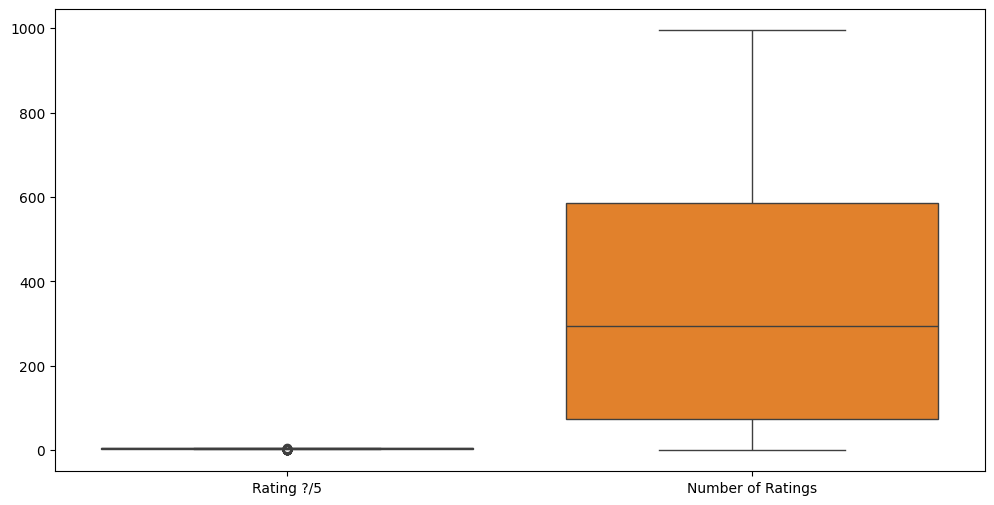

In [32]:
num = ['Rating ?/5', 'Number of Ratings']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mbp[num])
plt.show()

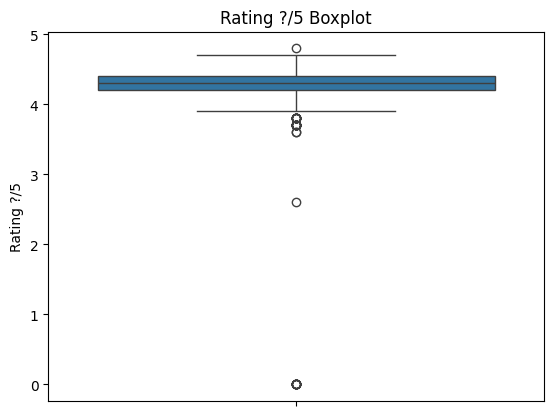

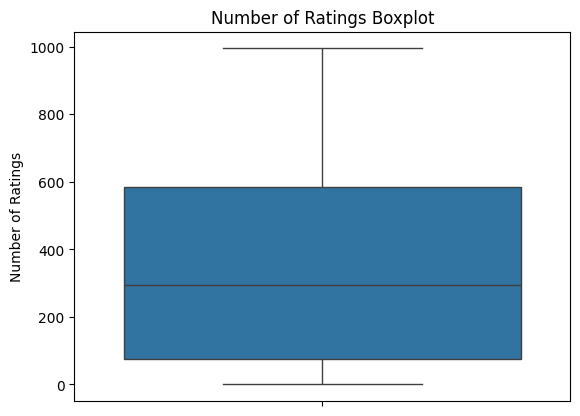

In [33]:
sns.boxplot(data=df_mbp['Rating ?/5'])
plt.title('Rating ?/5 Boxplot')
plt.show()

sns.boxplot(data=df_mbp['Number of Ratings'])
plt.title('Number of Ratings Boxplot')
plt.show()

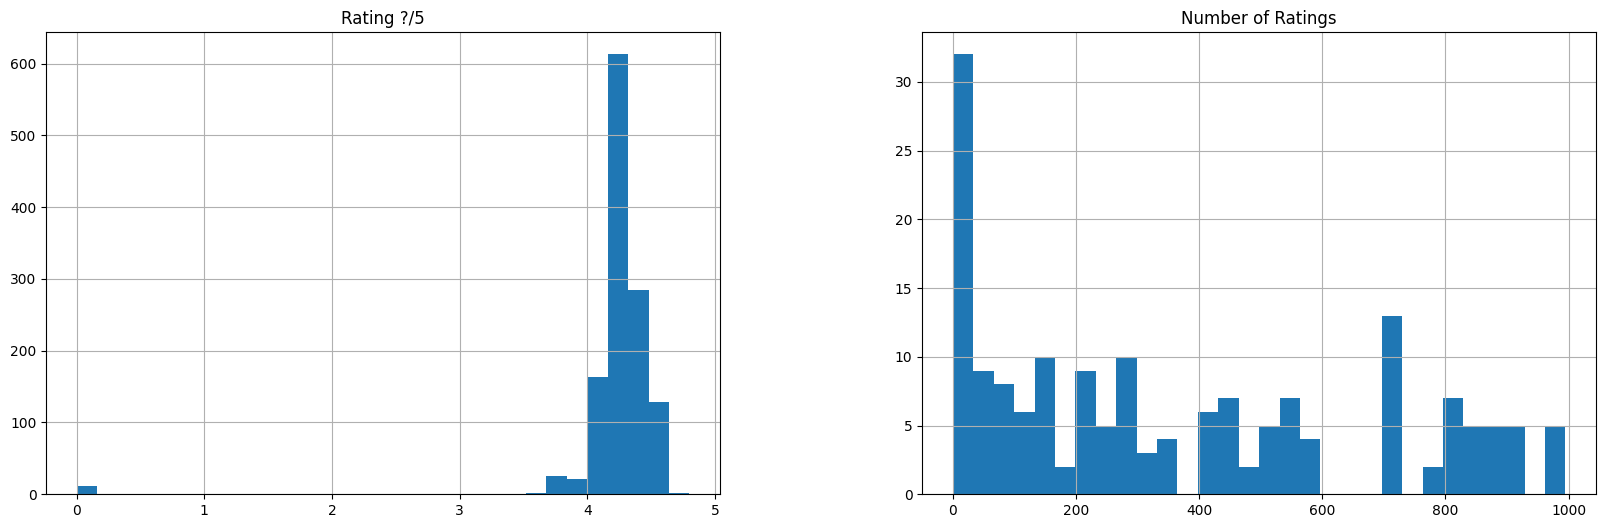

In [34]:
df_mbp[num].hist(bins = 30, figsize = (20, 6))
plt.show()

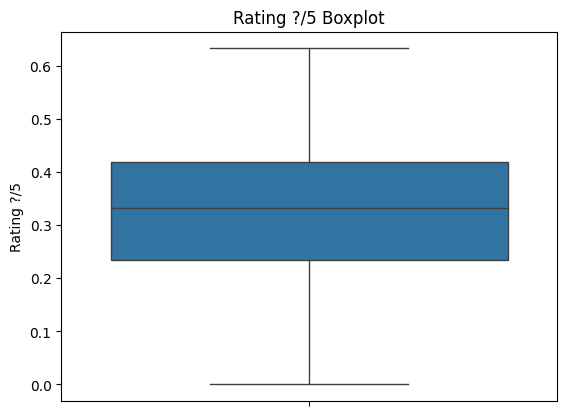

In [57]:
def remove_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data

df_mbp = remove_outliers(df_mbp, 'Rating ?/5')

df_mbp['Rating ?/5'] = np.log(df_mbp['Rating ?/5'] + 1)

sns.boxplot(data=df_mbp['Rating ?/5'])
plt.title('Rating ?/5 Boxplot')
plt.show()

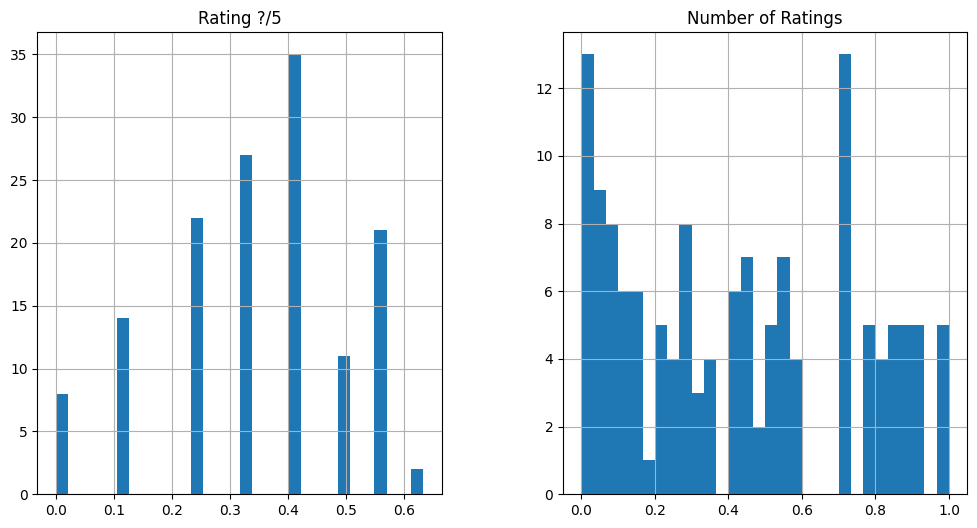

In [58]:
df_mbp[num].hist(bins=30, figsize=(12,6))
plt.show()

In [59]:
df_mbp['Rating Category'] = pd.qcut(df_mbp['Rating ?/5'], q=3, labels=['Low', 'Medium', 'High'])

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['Number of Ratings', 'Rating ?/5']  # Sesuaikan dengan dataset
df_mbp[num_cols] = scaler.fit_transform(df_mbp[num_cols])

In [61]:
df_mbp = pd.get_dummies(df_mbp, columns=['Rating Category'], drop_first=True)

In [62]:
x = df_mbp.drop('Price in INR', axis=1)
y = df_mbp['Price in INR']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 13), (35, 13), (105,), (35,))

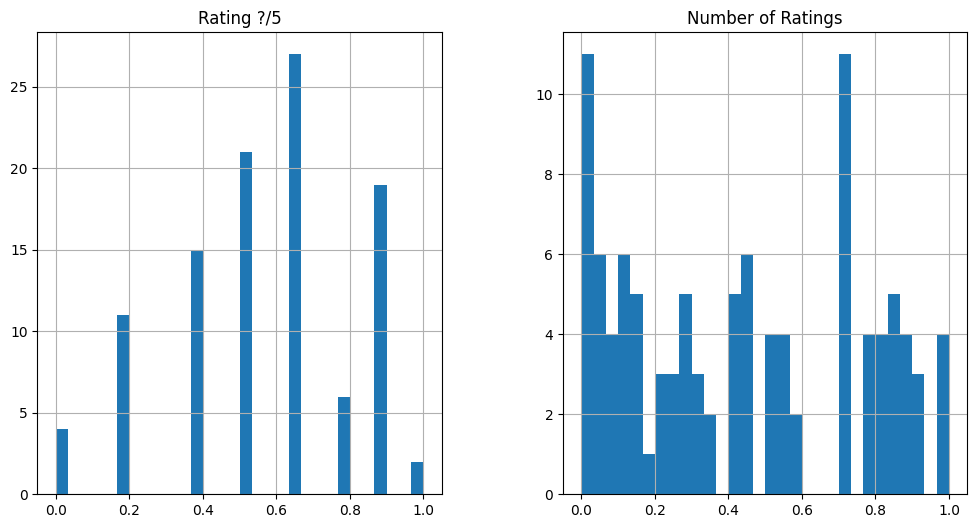

In [63]:
x_train[num].hist(bins=30, figsize=(12,6))
plt.show()

In [64]:
categorical_cols = x_train.select_dtypes(include=['string']).columns
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

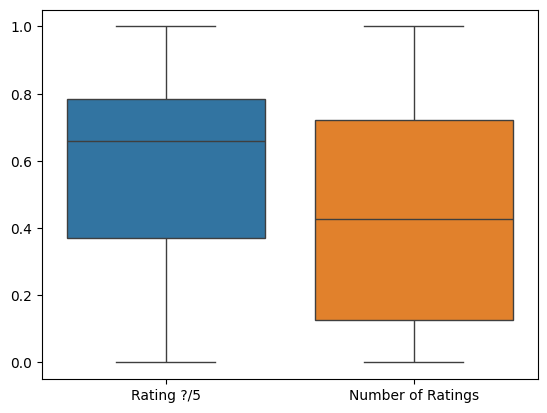

In [65]:
sns.boxplot(data=x_train[num])
plt.show()

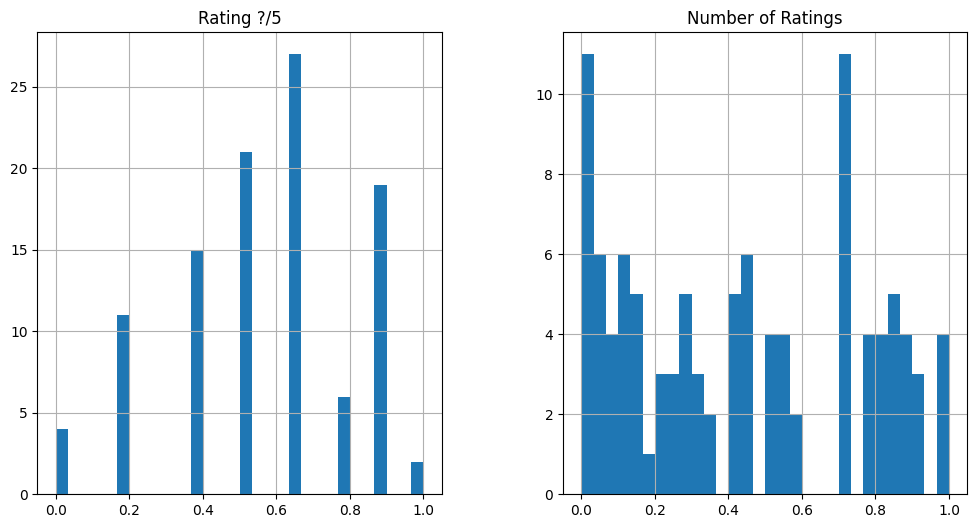

In [66]:
x_train[num].hist(bins=30, figsize=(12,6))
plt.show()

In [67]:
x_train['Rating ?/5'].skew(), x_train['Number of Ratings'].skew()

(-0.3966172750054453, 0.18254074558670644)

In [68]:
categorical_cols = x_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(x_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
Phone Name
SAMSUNG Galaxy A13 (Black, 128 GB)           2
SAMSUNG Galaxy A23 (Blue, 128 GB)            2
vivo X90 (Asteroid Black, 256 GB)            2
vivo X90 (Breeze Blue, 256 GB)               2
Nokia C 30 (Green, 32 GB)                    1
                                            ..
realme Narzo 50i Prime (Dark Blue, 64 GB)    1
SAMSUNG Galaxy A13 (White, 64 GB)            1
Alcatel Pixi 4 (6) 4G (Metal Gold, 16 GB)    1
OPPO A785G (Blue, 128 GB)                    1
Mi 11X Pro 5G (Celestial Silver, 128 GB)     1
Name: count, Length: 101, dtype: int64
--------------------------------------------------
Back/Rare Camera
50MP + 2MP                     11
64MP + 2MP + 2MP                6
8MP Rear Camera                 6
50MP + 12MP + 12MP              6
48MP + 8MP + 5MP                6
13MP Rear Camera                5
200MP + 10MP + 12MP + 10MP      4
50MP Rear Camera                4
50MP + 5MP + 2MP + 2MP          4
13MP + 2

In [69]:
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

x_train.head(10)

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Front Camera,Battery,Rating Category_Medium,Rating Category_High,Rating Category_Medium,Rating Category_High,...,Processor_Qualcomm Snapdragon 8+ Gen 1 Processor,Processor_Qualcomm Snapdragon 865 Processor,Processor_Qualcomm Snapdragon 888 Processor,"Processor_Qualcomm® Snapdragon™ 855 Plus (Octa-core, 7nm, up to 2.96 GHz) , with Qualcomm AI Engine Processor",Processor_SDM710 Processor,Processor_Snapdragon 695 Processor,Processor_Spreadtrum SC9863A Processor,Processor_Unisoc T606 Processor,Processor_Unisoc T612 processor Processor,Processor_Unisoc UMS9230 Processor
672,0.370866,0.863041,4,128,8,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
934,0.660471,0.084592,4,128,16,5000,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1677,0.198134,0.000000,512,4,0,1500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
779,0.523682,0.799597,4,128,8,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46,0.523682,0.461229,12,256,16,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
748,0.660471,0.883182,8,128,8,5000,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
626,0.660471,0.723061,12,256,12,5000,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
661,0.523682,0.038268,4,128,5,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
599,0.198134,0.044310,4,128,5,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1001,0.660471,0.025176,8,256,16,4500,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [70]:
x_train.columns

Index(['Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage', 'Front Camera',
       'Battery', 'Rating Category_Medium', 'Rating Category_High',
       'Rating Category_Medium', 'Rating Category_High',
       ...
       'Processor_Qualcomm Snapdragon 8+ Gen 1 Processor',
       'Processor_Qualcomm Snapdragon 865 Processor',
       'Processor_Qualcomm Snapdragon 888 Processor',
       'Processor_Qualcomm® Snapdragon™ 855 Plus (Octa-core, 7nm, up to 2.96 GHz) , with Qualcomm AI Engine Processor',
       'Processor_SDM710 Processor', 'Processor_Snapdragon 695 Processor',
       'Processor_Spreadtrum SC9863A Processor',
       'Processor_Unisoc T606 Processor',
       'Processor_Unisoc T612 processor Processor',
       'Processor_Unisoc UMS9230 Processor'],
      dtype='object', length=199)

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

all_unique_values = pd.concat([pd.Series(y_train), pd.Series(y_test)]).unique()
le.fit(all_unique_values)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train

array([25, 33,  2, 27, 51, 29, 76, 15, 18, 44, 53, 15, 12, 49, 32, 68, 23,
       32, 55, 39, 13, 77, 74, 69, 12, 49, 29, 39, 76, 68, 38, 34, 10, 23,
        5, 21, 45, 66, 74, 57, 64, 51, 19, 73, 45, 61, 48, 49, 57, 24,  1,
       57, 75,  9, 22, 41, 18, 50, 56, 51, 65, 67, 77, 56,  9,  0, 60,  7,
       36, 18, 42, 35, 71, 58, 39, 62, 40, 39, 12, 56, 43, 27, 52, 16, 18,
       31, 44, 51, 15, 17, 51, 51, 47, 67,  4, 69, 12, 52, 20, 37, 14, 31,
       32, 72, 53])

In [72]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
51    6
39    4
18    4
12    4
56    3
     ..
1     1
75    1
22    1
41    1
72    1
Name: count, Length: 66, dtype: int64

Test Label 
13    3
22    3
23    2
29    2
28    2
49    2
54    1
18    1
70    1
59    1
30    1
6     1
26    1
61    1
19    1
63    1
17    1
45    1
11    1
8     1
46    1
73    1
33    1
41    1
75    1
3     1
15    1
Name: count, dtype: int64


In [73]:
x_train

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Front Camera,Battery,Rating Category_Medium,Rating Category_High,Rating Category_Medium,Rating Category_High,...,Processor_Qualcomm Snapdragon 8+ Gen 1 Processor,Processor_Qualcomm Snapdragon 865 Processor,Processor_Qualcomm Snapdragon 888 Processor,"Processor_Qualcomm® Snapdragon™ 855 Plus (Octa-core, 7nm, up to 2.96 GHz) , with Qualcomm AI Engine Processor",Processor_SDM710 Processor,Processor_Snapdragon 695 Processor,Processor_Spreadtrum SC9863A Processor,Processor_Unisoc T606 Processor,Processor_Unisoc T612 processor Processor,Processor_Unisoc UMS9230 Processor
672,0.370866,0.863041,4,128,8,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
934,0.660471,0.084592,4,128,16,5000,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1677,0.198134,0.000000,512,4,0,1500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
779,0.523682,0.799597,4,128,8,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46,0.523682,0.461229,12,256,16,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0.198134,0.257805,2,32,5,4230,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1345,0.198134,0.872105,6,128,8,5050,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
574,0.523682,1.000000,6,128,8,5000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
971,0.784093,0.219537,12,256,32,4870,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [74]:
x_train['Price in INR'] = y_train
x_test['Price in INR'] = y_test

In [75]:
x_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 672 to 1126
Data columns (total 200 columns):
 #    Column                                                                                                                                                     Non-Null Count  Dtype  
---   ------                                                                                                                                                     --------------  -----  
 0    Rating ?/5                                                                                                                                                 105 non-null    float64
 1    Number of Ratings                                                                                                                                          105 non-null    float64
 2    RAM                                                                                                                                                   

In [76]:
x_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1361 to 680
Data columns (total 89 columns):
 #   Column                                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                                     --------------  -----  
 0   Rating ?/5                                                                                                                                                 35 non-null     float64
 1   Number of Ratings                                                                                                                                          35 non-null     float64
 2   RAM                                                                                                                                                        35

In [77]:
print("Train missing data:", x_train.isna().sum().sum(), "\nTest missing data:", x_test.isna().sum().sum())
print()
print("Train duplicated data:", x_train.duplicated().sum(), "\nTest duplicated data:", x_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
